# Gridded Output - Time Differencing

This notebook demonstrates calculating a time difference for a gridded variable and putting the result into the data array.

### Import Packages

In [1]:
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

from metpy.plots import declarative
from metpy.units import units
import xarray as xr

### Get Data

In [2]:
# Set the date/time of the model run
date = datetime(2022, 3, 27, 0)

# Remote access to the dataset from the UCAR site
ds = xr.open_dataset('https://thredds.ucar.edu/thredds/dodsC/grib'
                     f'/NCEP/GFS/Global_onedeg/GFS_Global_onedeg_{date:%Y%m%d}_{date:%H%M}.grib2')

# Subset data to be just over the U.S. for plotting purposes
ds = ds.sel(lat=slice(70,10), lon=slice(360-150, 360-55)).metpy.parse_cf()

### Time Difference Calculation

Note, we need to first create the variable in the DataArray using an exisitng variable as a template (this preserves important attributes like the variable units), then update the values.

In [3]:
ds['mslp_change'] = (ds.MSLP_Eta_model_reduction_msl.metpy.sel(time=date+timedelta(hours=3)).metpy.quantify()
                     - ds.MSLP_Eta_model_reduction_msl.metpy.sel(time=date).metpy.quantify())

### Plot Data

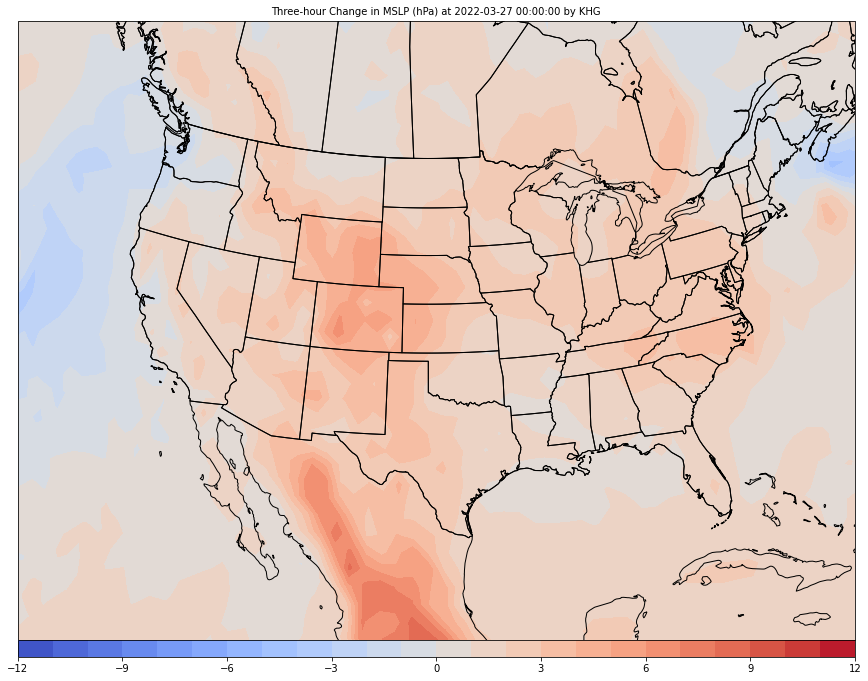

In [4]:
# Set the plot time with forecast hours
plot_time = date + timedelta(hours=0)

# Set attributes for plotting filled contours
cfill = declarative.FilledContourPlot()
cfill.data = ds
cfill.field = 'mslp_change'
cfill.level = None
cfill.time = None
cfill.contours = list(range(-12, 13, 1))
cfill.colormap = 'coolwarm'
cfill.colorbar = 'horizontal'
cfill.plot_units = 'hPa'

# Set the attributes for the map
# and put the contours on the map
panel = declarative.MapPanel()
panel.area = [-125, -74, 20, 55]
panel.projection = 'lcc'
panel.layers = ['states', 'coastline', 'borders']
panel.title = f'Three-hour Change in MSLP (hPa) at {plot_time} by KHG'
panel.plots = [cfill]

# Set the attributes for the panel
# and put the panel in the figure
pc = declarative.PanelContainer()
pc.size = (15, 15)
pc.panels = [panel]

# Show the figure
pc.show()